<a href="https://colab.research.google.com/github/ajayn3300/SMS_Spam_Detector---NLP/blob/main/SMS_Spam_Detector_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns 

In [2]:
# import data
data=pd.read_csv('https://raw.githubusercontent.com/ajayn3300/SMS_Spam_Detector---NLP/main/spam.csv',encoding='latin-1')
data=data.loc[:,['v1','v2']]

In [3]:
# data sample
data.sample(3)

,v1,v2
220,ham,Ok no prob. Take ur time.
984,ham,Yo guess what I just dropped
3476,ham,I got it before the new year cos yetunde said ...


In [4]:
#data shape
data.shape

(5572, 2)

In [5]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Cleaning

In [6]:
# Let's rename the columns first
data.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [7]:
#data sample
data.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# null values
data.isna().sum()

target     0
message    0
dtype: int64

In [9]:
#duplicate values
data[data.duplicated()]

,target,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
# removing duplicates
data.drop_duplicates(inplace=True)

In [11]:
# new shape 
data.shape

(5169, 2)

# EDA

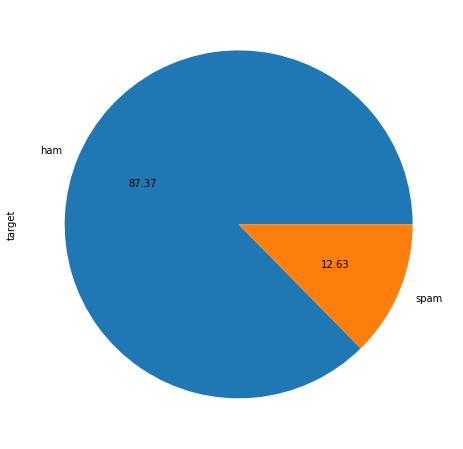

In [12]:
# lets check our target data 
plt.figure(figsize=(15,8))
data.target.value_counts().plot(kind='pie',autopct='%0.2f')

      Oops! Imbalaced dataset.

In [13]:
# add no. of character in text 
data['character_count']=data['message'].apply(len)

In [14]:
#adding column name no.of words 
nltk.download('punkt')

data['words_count']=data.message.apply(lambda x : len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
# adding column called sentence count
data['sent_count']=data.message.apply(lambda x : len(nltk.sent_tokenize(x)))

In [16]:
# data sample
data.sample(5)

,target,message,character_count,words_count,sent_count
2056,ham,.Please charge my mobile when you get up in mo...,52,11,1
2782,ham,Well at this right I'm gonna have to get up an...,121,29,1
2552,ham,"Oh fine, I'll be by tonight",27,8,1
4851,ham,I liked your new house,22,5,1
1725,ham,You know there is. I shall speak to you in &l...,67,20,2


In [17]:
# description for ham
data[data['target']=='ham'].describe()

,character_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [18]:
#description for spam
data[data['target']=='spam'].describe()

,character_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


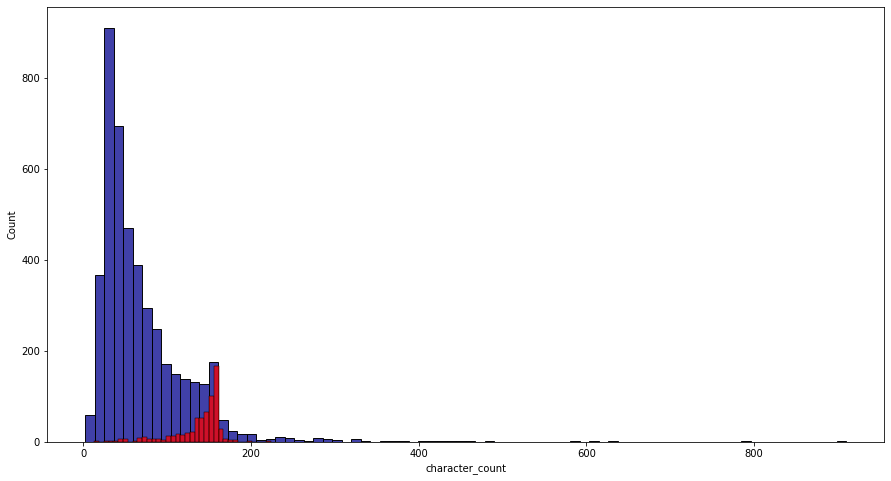

In [19]:
# Number of chacracter count
plt.figure(figsize=(15,8))
sns.histplot(data[data['target']=='ham'].character_count,color='darkblue',bins=80)
sns.histplot(data[data['target']=='spam'].character_count,color='red')

      Numbers of character count  are less in spam(red) 

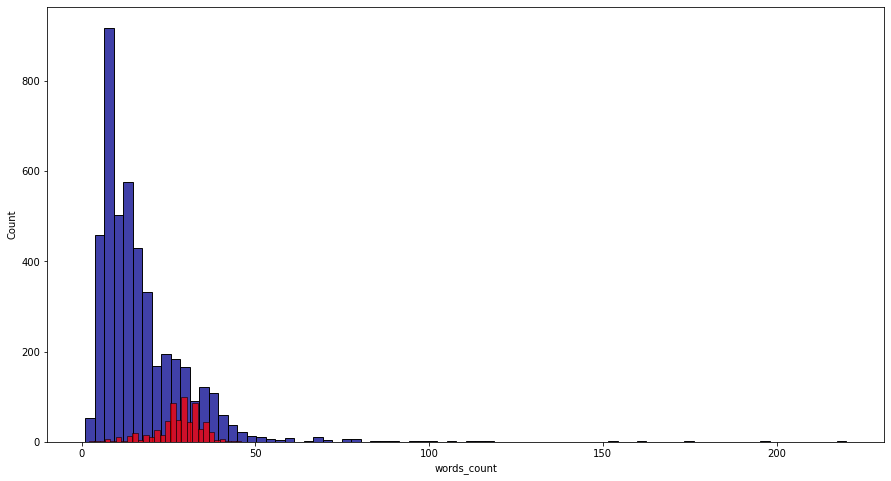

In [20]:
# no.of words count
plt.figure(figsize=(15,8))
sns.histplot(data[data['target']=='ham'].words_count,color='darkblue',bins=80)
sns.histplot(data[data['target']=='spam'].words_count,color='red')

In [21]:
data[data['target']=='ham'].words_count.mean()

17.12090345438441

<Figure size 720x576 with 0 Axes>

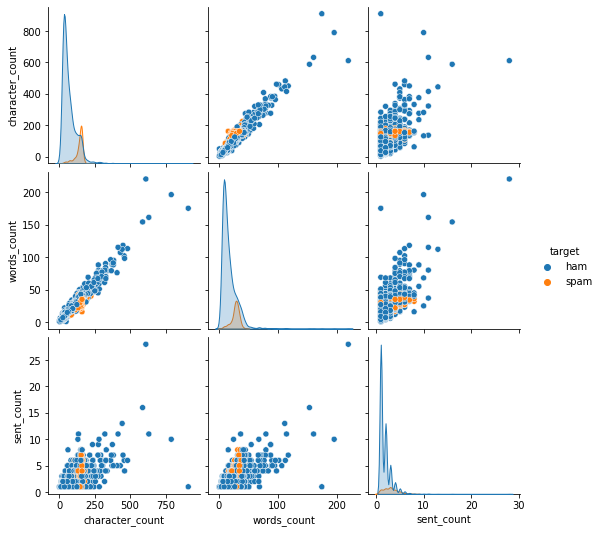

In [22]:
plt.figure(figsize=(10,8))
sns.pairplot(data,hue='target')

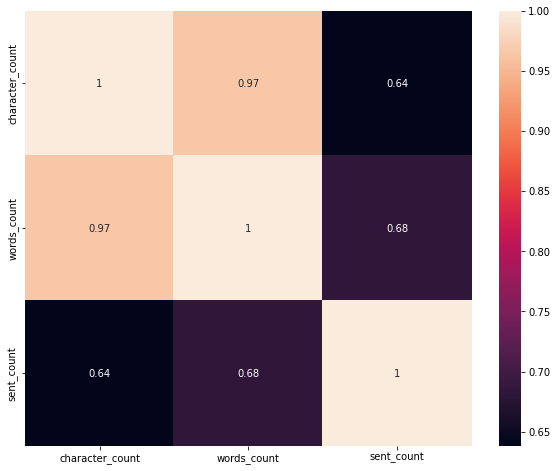

In [23]:
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),annot=True)

   HIGH multicolinearity...we will keep only one columns from these three.

# Data Preprocessing 

In [24]:
# changing into lower case
data['message']=data.message.apply(lambda x :x.lower())

In [25]:
# removing special characters and punctuations
import string
data['message']=data.message.apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [26]:
# tokenization
data['message']=data.message.apply(lambda x : nltk.word_tokenize(x))

In [27]:
# removing stopwords

#library
from nltk.corpus import stopwords
nltk.download('stopwords')


#remove
data['message']=data.message.apply(lambda  x:[i for i in x if i not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
# stemming

#library 
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

#let's stem
data['message']=data.message.apply(lambda x:' '.join([stemmer.stem(i) for i in x]))

In [29]:
# label encoding of our target variable
data['target']=data.target.apply(lambda x :1 if x=='spam' else 0)

In [30]:
# deleting single letter words


# Let's make a function
def remove_single(x):
  a=x.split()
  for i in a:
    if len(i)==1 and i!='i' and i!='u':
      a.remove(i)
  return ' '.join(a)

# Let's remove
data['message']=data.message.apply(lambda x:remove_single(x))

In [31]:
#data sample
data.head(3)

,target,message,character_count,words_count,sent_count
0,0,go jurong point crazi avail bugi great world l...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri wkli comp win fa cup final tkt 21st...,155,37,2


In [32]:
# creating Wordclouds 


from wordcloud import WordCloud     #import library
wc=WordCloud(width=700,height=600,min_font_size=10,background_color='black')    #intiate class

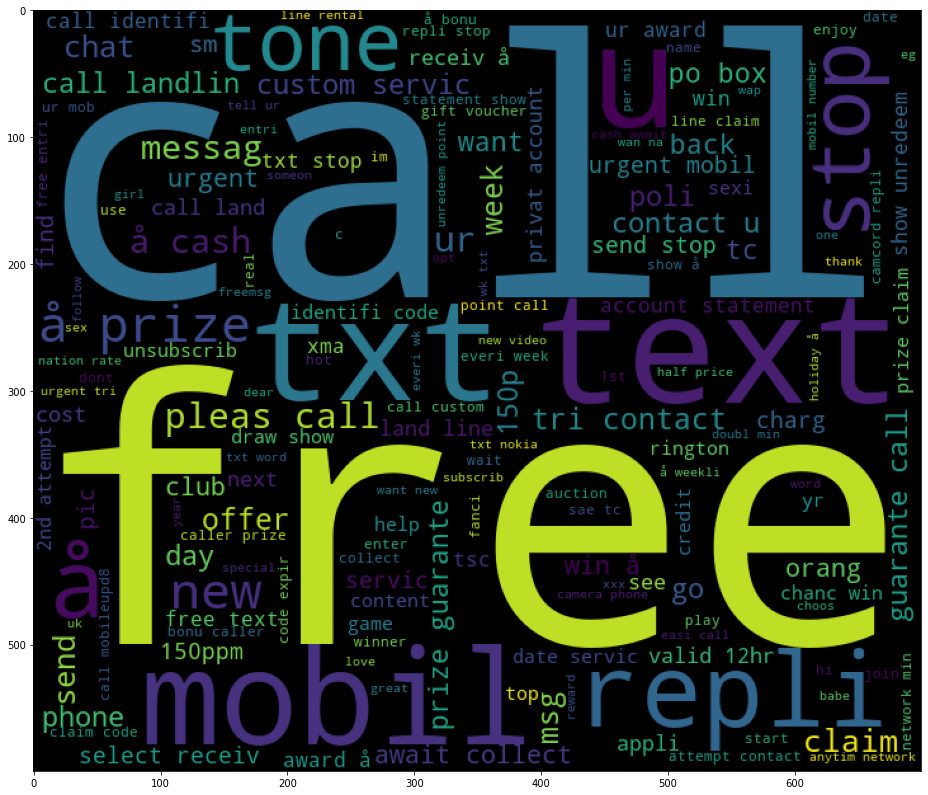

In [33]:
# word cloud for spam messages
spam_wc=wc.generate(data[data['target']==1]['message'].str.cat(sep=' '))
plt.figure(figsize=(18,14))
plt.imshow(spam_wc)

      These are the words in spam messages which have occured for most no.
             of time. The size of the words represents the occurence of those
                            words ,bigger the size ,larger the no. of occurence.

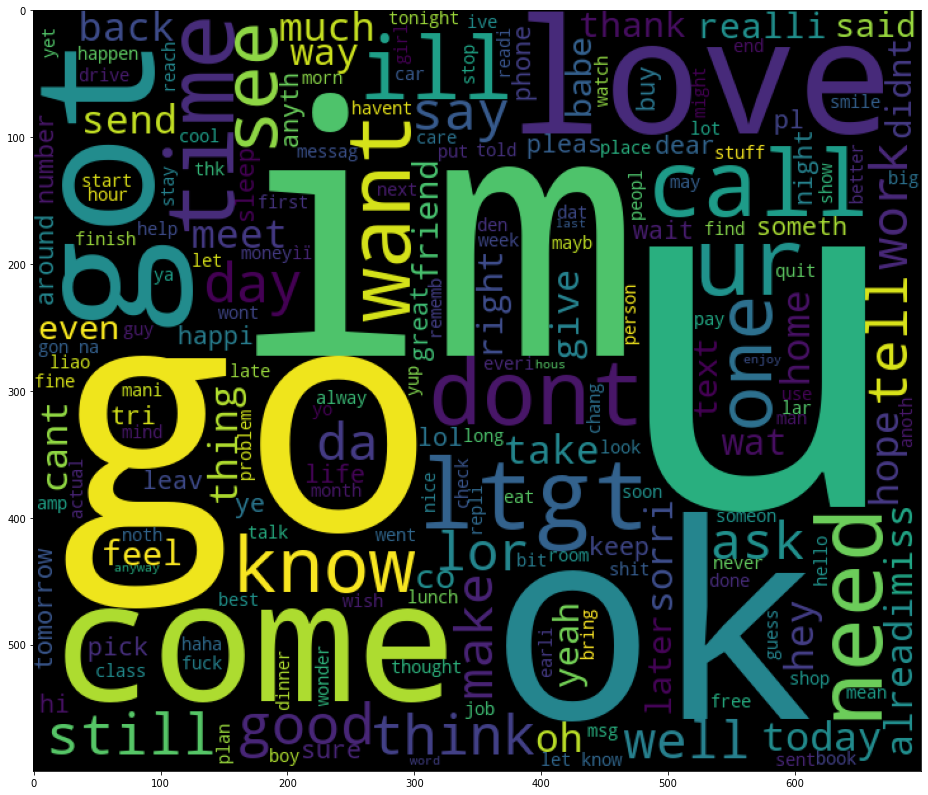

In [34]:
# word cloud from ham message
ham_wc=wc.generate(data[data['target']==0]['message'].str.cat(sep=' '))
plt.figure(figsize=(18,14))
plt.imshow(ham_wc)

      Same goes with messages which are not spam

**Let's plot top 15 words from both spam and ham messages and crosscheck with our  world clouds**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

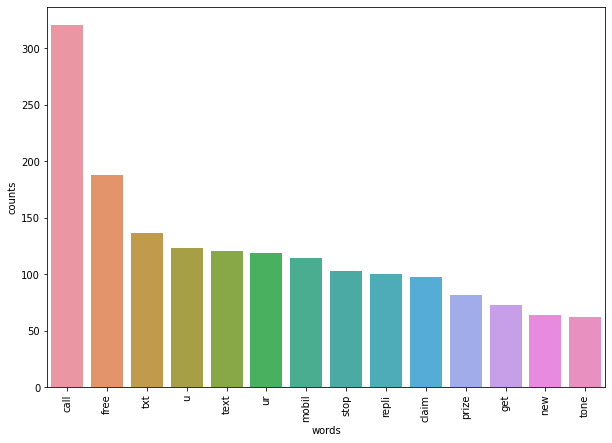

In [35]:
              #SPAM

# list of spam words
spam_words=data[data['target']==1]['message'].str.cat(sep=' ').split()

#creating a dict of word count
spam_dict={}
for i in spam_words:
  spam_dict[i]=spam_words.count(i)
spam_15=dict(sorted([(k,v) for v,k in spam_dict.items()],reverse=True)[:15])
spam_15=pd.DataFrame({'words':spam_15.values(),'counts':spam_15.keys()})

#plot
plt.figure(figsize=(10,7))
sns.barplot(spam_15['words'],spam_15['counts'])
plt.xticks(rotation='vertical')

        These are most occuring words in spam messages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

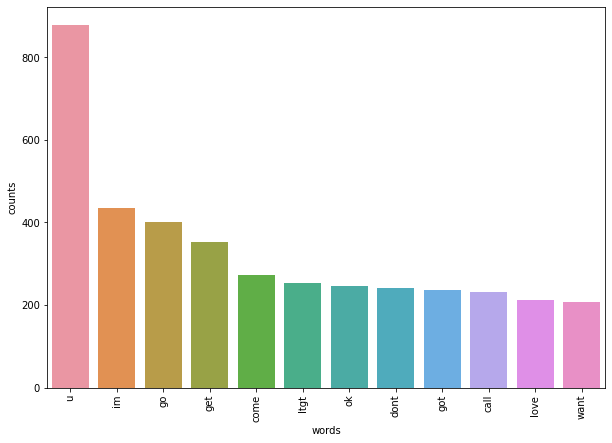

In [36]:
              #HAM

# list of ham words
ham_words=data[data['target']==0]['message'].str.cat(sep=' ').split()

#creating a dict of word count
ham_dict={}
for i in ham_words:
  ham_dict[i]=ham_words.count(i)
ham_15=dict(sorted([(k,v) for v,k in ham_dict.items()],reverse=True)[:15])
ham_15=pd.DataFrame({'words':ham_15.values(),'counts':ham_15.keys()})

#plot
plt.figure(figsize=(10,7))
sns.barplot(ham_15['words'],ham_15['counts'])
plt.xticks(rotation='vertical')

# Model Building 

In [37]:
# library from coverting words into numbers
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=2800)
vectorizer=CountVectorizer(max_features=3100)

In [98]:
#convert
x=vectorizer.fit_transform(data.message).toarray()

In [99]:
#  input shape
x.shape

(5169, 3100)

In [100]:
#y
y=data.target.values

In [101]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=
                                               0)

In [102]:
#x_train shape and test shape
x_train.shape,x_test.shape

((4135, 3100), (1034, 3100))

In [103]:
# importing Naive bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


mnb=MultinomialNB()


In [104]:
mnb.fit(x_train,y_train)

MultinomialNB()

# Model Evaluation

In [45]:
# classification metrices
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [46]:
#accuracy on test data
accuracy_score(y_test,mnb.predict(x_test))

0.9796905222437138

In [47]:
# f1_score of test data
f1_score(y_test,mnb.predict(x_test))

0.9283276450511946

In [48]:
print(classification_report(y_test,mnb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.94      0.91      0.93       149

    accuracy                           0.98      1034
   macro avg       0.96      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



<Figure size 1008x576 with 0 Axes>

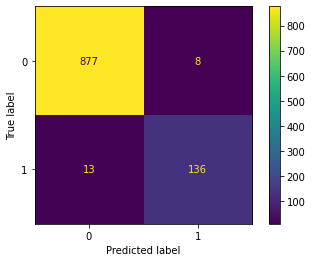

In [49]:
plt.figure(figsize=(14,8))
ConfusionMatrixDisplay(confusion_matrix(y_test,mnb.predict(x_test))).plot()

(3100,)

In [70]:
stri='My name is Khan and i am not a Terrorist!'

In [108]:
def predict(stri):
  # lower case
  st=stri.lower()

  # remove punctuation
  st=''.join([i for i in st.lower() if i not in string.punctuation])

  # remove stopwords
  st=[i for i in st.split() if i not in stopwords.words('english')]
  
  # stems
  st=' '.join([stemmer.stem(i) for i in st]) 

  #vectorize
  st=vectorizer.transform(pd.Series(st)).toarray()

  #predict
  pred=mnb.predict(st)

  return pred

In [110]:
predict('Kindly supply your bank routing and account number to receive your refund')

array([1])

In [113]:
#let's pickle things that we need for model deployment
import pickle

pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))